In [59]:
# 순환 신경망

# LSTM 이용, 로이터 뉴스 카테고리 분류

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

from attention import Attention

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# 데이터 가져오기 
(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words=1000,test_split=0.2) 
# num_words 빈도수가 큰 것을 기준으로 구분된 1000개의 단어를 가져온다. 

In [34]:
# 데이터 확인

category = np.max(y_train) +1
print(category, '종류(카테고리)')
print(len(x_train),'학습용 뉴스기사')
print(len(x_test),'테스트용 뉴스기사')

46 종류(카테고리)
8982 학습용 뉴스기사
2246 테스트용 뉴스기사


In [35]:
len(y_train)

8982

In [36]:
# 단어의 수 맞춰보기

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

In [37]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [38]:
# 원-핫 인코딩 처리

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
# 모델 구조 

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh')) # LSTM은 tanh를 좋아한다. sequence data니까. 
model.add(Dense(46,activation='softmax')) # 46개 카테고리 별 출력 

# 모델 컴파일

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행 
history = model.fit(x_train, y_train, batch_size =20, epochs=200, validation_data = (x_test,y_test),
          callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('\n 테스트 정확도 :%.4f'%(model.evaluate(x_test,y_test)[1]))


Epoch 1/200
450/450 [==============================] - 13s 27ms/step - loss: 2.2553 - accuracy: 0.4231 - val_loss: 2.0097 - val_accuracy: 0.5156
Epoch 2/200
450/450 [==============================] - 11s 25ms/step - loss: 1.8129 - accuracy: 0.5443 - val_loss: 1.6956 - val_accuracy: 0.5606
Epoch 3/200
450/450 [==============================] - 11s 24ms/step - loss: 1.6745 - accuracy: 0.5762 - val_loss: 1.6830 - val_accuracy: 0.5735
Epoch 4/200
450/450 [==============================] - 11s 24ms/step - loss: 1.5148 - accuracy: 0.6152 - val_loss: 1.5205 - val_accuracy: 0.6202
Epoch 5/200
450/450 [==============================] - 11s 24ms/step - loss: 1.3478 - accuracy: 0.6607 - val_loss: 1.3763 - val_accuracy: 0.6541
Epoch 6/200
450/450 [==============================] - 12s 26ms/step - loss: 1.2061 - accuracy: 0.6953 - val_loss: 1.3110 - val_accuracy: 0.6701
Epoch 7/200
450/450 [==============================] - 12s 27ms/step - loss: 1.0860 - accuracy: 0.7292 - val_loss: 1.2069 - val_ac

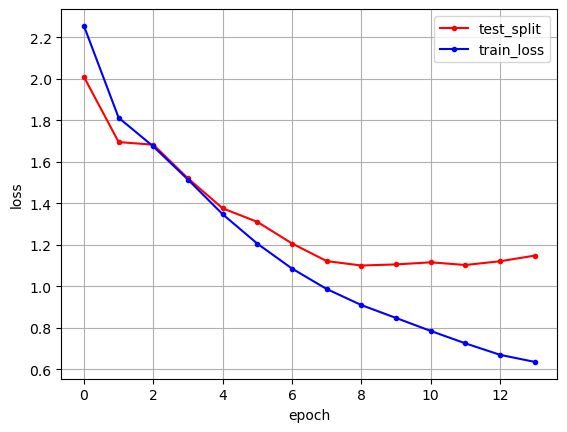

In [42]:
# 데이터 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='test_split')
plt.plot(x_len, y_loss, marker='.',c='blue',label='train_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---

### LSTM / CNN 조합 >> 영화 리뷰 분류하기

In [47]:
# LSTM / CNN 조합 >> 영화 리뷰 분류하기

# 데이터 불러오기 

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)

17464789/17464789 [==============================] - 0s 0us/step


In [48]:
# 단어의 수를 맞추어 주기
x_train = sequence.pad_sequences(x_train,maxlen=500)
x_test = sequence.pad_sequences(x_test,maxlen=500)

In [49]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [55]:
# 모델 구조 설정

model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid', activation='relu', strides=1)) 
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 55)                26400     
                                                                 
 dense_7 (Dense)             (None, 1)                 56        
                                                      

In [56]:
# 모델 실행 

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# 조기 중단 설정 

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, batch_size=40, epochs=200, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('\n 테스트 정확도 : %.4f' %model.evaluate(x_test, y_test)[1])

Epoch 1/200
469/469 [==============================] - 24s 49ms/step - loss: 0.4268 - accuracy: 0.7855 - val_loss: 0.2814 - val_accuracy: 0.8875
Epoch 2/200
469/469 [==============================] - 24s 50ms/step - loss: 0.2380 - accuracy: 0.9051 - val_loss: 0.2604 - val_accuracy: 0.8917
Epoch 3/200
469/469 [==============================] - 25s 54ms/step - loss: 0.1869 - accuracy: 0.9294 - val_loss: 0.2741 - val_accuracy: 0.8922
Epoch 4/200
469/469 [==============================] - 25s 53ms/step - loss: 0.1445 - accuracy: 0.9482 - val_loss: 0.2890 - val_accuracy: 0.8898
Epoch 5/200
469/469 [==============================] - 25s 54ms/step - loss: 0.1161 - accuracy: 0.9597 - val_loss: 0.3124 - val_accuracy: 0.8846
Epoch 6/200
469/469 [==============================] - 25s 53ms/step - loss: 0.1011 - accuracy: 0.9636 - val_loss: 0.3387 - val_accuracy: 0.8806
Epoch 7/200
782/782 [==============================] - 9s 11ms/step - loss: 0.3909 - accuracy: 0.8784

 테스트 정확도 : 0.8784


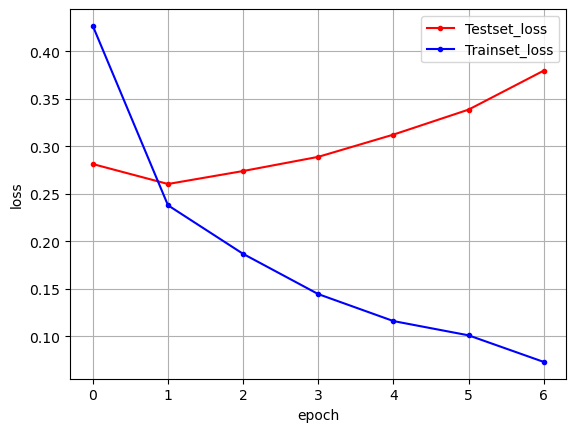

In [57]:
# 데이터 시각화

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss, marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---

### 어텐션 신경망

In [58]:
# 어텐션 (attention) 신경망

! pip install attention

In [60]:
# 모델 구조 재설계

model=Sequential()
model.add(Embedding(5000,500)) # 5000 개를 500개로
model.add(LSTM(64,return_sequences=True))
# return_sequences=True >>> 각 시퀀스에서 출력을 해달라는 의미
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 500)         2500000   
                                                                 
 lstm_9 (LSTM)               (None, None, 64)          144640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,665,249
Trainable params: 2,665,249
Non-trainable params: 0
_________________________________________________________________


In [61]:
# 모델 실행 옵션 설정 

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# 조기종료 옵션 설정 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델 실행 
history = model.fit(x_train,y_train, batch_size=40, epochs=200, validation_data=(x_test,y_test),
          callbacks=[early_stopping_callback])

# 테스트 정확도 출력
print('\n 테스트 정확도: %.4f' %model.evaluate(x_test, y_test)[1])

Epoch 1/200
625/625 [==============================] - 345s 551ms/step - loss: 0.3713 - accuracy: 0.8283 - val_loss: 0.2952 - val_accuracy: 0.8728
Epoch 2/200
625/625 [==============================] - 354s 567ms/step - loss: 0.2071 - accuracy: 0.9172 - val_loss: 0.2670 - val_accuracy: 0.8900
Epoch 3/200
625/625 [==============================] - 360s 576ms/step - loss: 0.1350 - accuracy: 0.9466 - val_loss: 0.3061 - val_accuracy: 0.8838
Epoch 4/200
625/625 [==============================] - 363s 581ms/step - loss: 0.0898 - accuracy: 0.9649 - val_loss: 0.3913 - val_accuracy: 0.8834
Epoch 5/200
625/625 [==============================] - 365s 584ms/step - loss: 0.0597 - accuracy: 0.9780 - val_loss: 0.4252 - val_accuracy: 0.8800
Epoch 6/200
625/625 [==============================] - 367s 588ms/step - loss: 0.0407 - accuracy: 0.9852 - val_loss: 0.4974 - val_accuracy: 0.8730
Epoch 7/200
782/782 [==============================] - 125s 160ms/step - loss: 0.5923 - accuracy: 0.8750
0.87496000528

In [ ]:
# 데이터 시각화

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss, marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---